In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [70]:
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [71]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [72]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df["label"] = data.target_names[data.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


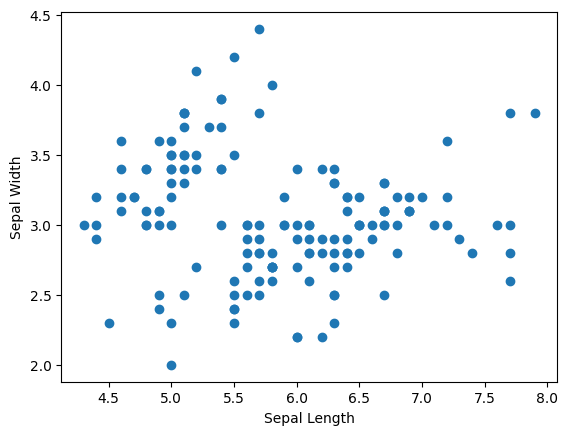

In [75]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
print(X_train, y_train)

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
knn.score(X_test, y_test)

1.0

In [79]:
df = pd.DataFrame(X_test, columns=data.feature_names)
df["target"] = y_test
df["label"] = data.target_names[y_test]
df["predireted"] = knn.predict(X_test)
df["predicted_label"] = data.target_names[knn.predict(X_test)]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,predireted,predicted_label
0,6.1,2.8,4.7,1.2,1,versicolor,1,versicolor
1,5.7,3.8,1.7,0.3,0,setosa,0,setosa
2,7.7,2.6,6.9,2.3,2,virginica,2,virginica
3,6.0,2.9,4.5,1.5,1,versicolor,1,versicolor
4,6.8,2.8,4.8,1.4,1,versicolor,1,versicolor
5,5.4,3.4,1.5,0.4,0,setosa,0,setosa
6,5.6,2.9,3.6,1.3,1,versicolor,1,versicolor
7,6.9,3.1,5.1,2.3,2,virginica,2,virginica
8,6.2,2.2,4.5,1.5,1,versicolor,1,versicolor
9,5.8,2.7,3.9,1.2,1,versicolor,1,versicolor


<Axes: >

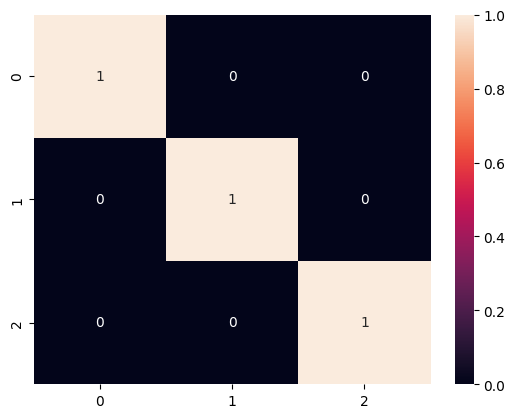

In [80]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test), normalize="true"), annot=True)

In [81]:
mean_squared_error(y_test, knn.predict(X_test))

0.0

In [82]:
scaler = StandardScaler()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(data.data), data.target, test_size=0.2, random_state=42)

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [86]:
knn.score(X_test, y_test)

1.0